# Optimization of parameters in genetic algorithms

This notebook gathers the results for the parameter optimization made on the mono-objective genetic algorithms, considering a binary threshold of 30.

### Brief explanation

With the previous exploration of parameters, we were able to determine which values resulted in better performances. There was obviously not a unique configuration yielding better results so, for the optimization run, we still allowed some variation. We basically assigned different probabilities of appearence to each of the parameters' values. The parameters, their possible values and their associated probabilities are:

- **Estimator**: SVM1 (c=2), SVM2 (c=10), SVM3 (c=50) ------------------------------- Probabilities: 0, 1, 0
- **Annihilation**: AN1 (0.2), AN2 (0.3), AN3 (0.4) ----------------------------------------- Probabilities: 0, 2/3, 1/3
- **Elite**: EL1 (0.2), EL2 (0.3), EL3 (0.4) ----------------------------------------------------- Probabilities: 1/4, 1/4, 2/4
- **Mutation rate**: MR1 (0.05), MR2 (0.1), MR3 (0.15) ---------------------------------- Probabilities: 2/4, 1/4, 1/4
- **Selection**: SE1 (tournament 2-1) , SE2 (tournament 5-2), SE3 (roulette) ------ Probabilities: 1/3, 1/3, 1/3

For each region, we run 20 models whose parameters are selected according to these probabilities. The best is chosen according to accuracy and f1 score in the test dataset.

### Import the packages

We import the packages that will be needed. In this case, everything is already contained in the gatools.py file, that loads submodules of PyWin module.

In [1]:
import matplotlib
import seaborn
import sys
sys.path.insert(0,'../../Tools')
from orderedlist import *
from gatools import *
bi = Binarization()
mo = Models()

In [2]:
pandas.set_option('display.max_rows', None)
pandas.set_option('display.max_columns', None)
pandas.set_option('display.width', None)
pandas.set_option('display.max_colwidth', None)

### Preparation of results

#### General stuff

In [3]:
qual_aal = bi.get_binary(pandas.read_csv('../../Data/Y_aal_quan.csv'),30)
qual_brodmann = bi.get_binary(pandas.read_csv('../../Data/Y_brodmann_quan.csv'),30)

In [4]:
features = pandas.read_csv('./Optimization_mono_30/optimization_best_features.csv')
features_all = pandas.read_csv('./Optimization_mono_30/optimization_features.csv')
train = pandas.read_csv('./Optimization_mono_30/optimization_best_train.csv')
test = pandas.read_csv('./Optimization_mono_30/optimization_best_test.csv')

In [5]:
tasks = ['_'.join([i.split('_')[-2],i.split('_')[-1]]) for i in list(features['Model'])]
tasks_brodmann = [i.split('_')[-1] for i in tasks if "b" in i]
tasks_aal = [i for i in tasks if not "b" in i]
tasks_aal.remove('f1mo_l')
tasks_aal.remove('f1mo_r')

In [ ]:
aal_list.remove('f1mo_l')
aal_list.remove('f1mo_r')

#### Metrics

In [6]:
pct_aal = round(numpy.divide(numpy.sum(qual_aal),qual_aal.shape[0]).to_frame().transpose(),3)
pct_aal = pct_aal.add_prefix('Region=')
pct_aal.index=['percentage_positive']
pct_brodmann = round(numpy.divide(numpy.sum(qual_brodmann),qual_brodmann.shape[0]).to_frame().transpose(),3)
pct_brodmann = pct_brodmann.add_prefix('Region=')
pct_brodmann.index=['percentage_positive']

In [7]:
metrics_aal = pandas.DataFrame()
for task in tasks_aal:
    temp_metrics = mo.evaluate_metrics(train,test,task)
    try: metrics_aal = pandas.concat([metrics_aal,temp_metrics],axis=1)
    except: metrics_aal = temp_metrics

In [8]:
metrics_brodmann = pandas.DataFrame()
for task in tasks_brodmann:
    temp_metrics = mo.evaluate_metrics(train,test,task)
    try: metrics_brodmann = pandas.concat([metrics_brodmann,temp_metrics],axis=1)
    except: metrics_brodmann = temp_metrics

#### Features

In [9]:
features_aal = pandas.DataFrame()
for task in tasks_aal:
    temp_features = mo.evaluate_features(features,features_all,task)
    try: features_aal = pandas.concat([features_aal,temp_features],axis=0)
    except: features_aal = temp_features

In [10]:
features_brodmann = pandas.DataFrame()
for task in tasks_brodmann:
    temp_features = mo.evaluate_features(features,features_all,task)
    try: features_brodmann = pandas.concat([features_brodmann,temp_features],axis=0)
    except: features_brodmann = temp_features

In [11]:
map_aal = pandas.DataFrame()
for task in aal_list:
    try: 
        temp_map = mo.map_features(features_all,features_list,task)
        try: map_aal = pandas.concat([map_aal,temp_map],axis=0)
        except: map_aal = temp_map
    except: pass

In [12]:
map_brodmann = pandas.DataFrame()
for task in brodmann_list:
    try: 
        temp_map = mo.map_features(features_all,features_list,task)
        try: map_brodmann = pandas.concat([map_brodmann,temp_map],axis=0)
        except: map_brodmann = temp_map
    except: pass

### Results

#### AAL atlas (90 regions)

Down below we show the **sorted regions according to accuracy and f1 score**. In the second table, only test information is given (those regions appearing at the top are the ones with better overall models).

In [13]:
metrics_pct_aal = pandas.concat([metrics_aal,pct_aal],join='inner')
metrics_pct_aal

,Region=o3_l,Region=t3_l,Region=t2_l,Region=o3_r,Region=amyg_r,Region=amyg_l,Region=f2o_r,Region=pcl_r,Region=t2_r,Region=tha_l,Region=in_l,Region=f3o_l,Region=t3_r,Region=cau_l,Region=o2_l,Region=fusi_l,Region=put_l,Region=ag_l,Region=acin_l,Region=o1_r,Region=f3t_l,Region=p2_l,Region=o2_r,Region=ag_r,Region=gr_r,Region=ling_r,Region=tha_r,Region=f1o_l,Region=in_r,Region=pal_r,Region=t1p_l,Region=f1_l,Region=o1_l,Region=acin_r,Region=put_r,Region=f2o_l,Region=hip_r,Region=fusi_r,Region=gr_l,Region=oc_l,Region=f1o_r,Region=smg_r,Region=sma_l,Region=pre_r,Region=p2_r,Region=f3op_l,Region=q_r,Region=smg_l,Region=f2_l,Region=pal_l,Region=phip_l,Region=f3o_r,Region=ro_r,Region=t2p_l,Region=pre_l,Region=f1_r,Region=f1m_l,Region=t1p_r,Region=oc_r,Region=pq_r,Region=f2_r,Region=t2p_r,Region=q_l,Region=pcin_l,Region=pq_l,Region=ling_l,Region=mcin_l,Region=mcin_r,Region=hip_l,Region=p1_l,Region=post_r,Region=v1_r,Region=hes_l,Region=f1m_r,Region=ro_l,Region=p1_r,Region=t1_l,Region=cau_r,Region=t1_r,Region=f3t_r,Region=sma_r,Region=pcin_r,Region=pcl_l,Region=phip_r,Region=f3op_r,Region=v1_l,Region=hes_r,Region=post_l
accuracy_test,0.910+/-0.022,0.823+/-0.036,0.827+/-0.045,0.931+/-0.019,0.968+/-0.021,0.984+/-0.012,0.902+/-0.034,0.978+/-0.015,0.766+/-0.036,0.924+/-0.024,0.896+/-0.028,0.887+/-0.023,0.767+/-0.036,0.922+/-0.026,0.842+/-0.043,0.847+/-0.035,0.938+/-0.026,0.805+/-0.035,0.866+/-0.017,0.880+/-0.038,0.848+/-0.040,0.784+/-0.036,0.793+/-0.042,0.795+/-0.042,0.879+/-0.026,0.896+/-0.031,0.921+/-0.025,0.872+/-0.029,0.839+/-0.027,0.979+/-0.015,0.883+/-0.032,0.815+/-0.034,0.899+/-0.022,0.860+/-0.027,0.942+/-0.020,0.873+/-0.025,0.899+/-0.030,0.766+/-0.038,0.874+/-0.030,0.937+/-0.021,0.860+/-0.036,0.832+/-0.043,0.908+/-0.036,0.810+/-0.025,0.789+/-0.038,0.855+/-0.032,0.874+/-0.027,0.838+/-0.046,0.784+/-0.046,0.963+/-0.016,0.881+/-0.026,0.824+/-0.032,0.898+/-0.037,0.872+/-0.036,0.821+/-0.037,0.769+/-0.032,0.826+/-0.033,0.805+/-0.047,0.873+/-0.026,0.772+/-0.039,0.746+/-0.047,0.778+/-0.038,0.868+/-0.025,0.836+/-0.041,0.766+/-0.038,0.878+/-0.029,0.766+/-0.048,0.754+/-0.039,0.895+/-0.027,0.787+/-0.039,0.848+/-0.036,0.874+/-0.027,0.904+/-0.031,0.817+/-0.045,0.914+/-0.028,0.801+/-0.041,0.747+/-0.032,0.893+/-0.031,0.737+/-0.057,0.775+/-0.040,0.885+/-0.030,0.827+/-0.051,0.840+/-0.035,0.761+/-0.041,0.788+/-0.038,0.777+/-0.045,0.952+/-0.015,0.813+/-0.047
accuracy_train,0.987+/-0.005,0.892+/-0.011,0.920+/-0.009,0.995+/-0.003,0.998+/-0.002,0.998+/-0.002,0.944+/-0.007,0.997+/-0.003,0.884+/-0.012,0.977+/-0.006,0.909+/-0.007,0.959+/-0.007,0.907+/-0.010,0.938+/-0.010,0.935+/-0.007,0.981+/-0.005,0.960+/-0.006,0.851+/-0.009,0.888+/-0.007,0.958+/-0.009,0.944+/-0.009,0.834+/-0.013,0.876+/-0.009,0.837+/-0.013,0.890+/-0.008,0.986+/-0.005,0.990+/-0.004,0.951+/-0.008,0.852+/-0.014,1.000+/-0.001,0.992+/-0.004,0.902+/-0.016,0.985+/-0.005,0.860+/-0.008,0.992+/-0.004,0.923+/-0.010,0.960+/-0.007,0.841+/-0.014,0.884+/-0.014,0.990+/-0.004,0.944+/-0.008,0.947+/-0.008,0.965+/-0.007,0.909+/-0.009,0.913+/-0.012,0.894+/-0.015,0.952+/-0.010,0.925+/-0.010,0.929+/-0.011,0.992+/-0.004,0.970+/-0.010,0.827+/-0.009,0.960+/-0.008,0.991+/-0.005,0.934+/-0.008,0.829+/-0.011,0.986+/-0.006,0.857+/-0.010,0.902+/-0.008,0.878+/-0.014,0.851+/-0.015,0.898+/-0.010,0.913+/-0.012,0.938+/-0.012,0.849+/-0.014,0.953+/-0.009,0.885+/-0.011,0.878+/-0.015,0.952+/-0.009,0.935+/-0.010,0.938+/-0.009,0.958+/-0.009,0.951+/-0.008,0.952+/-0.008,0.971+/-0.006,0.920+/-0.014,0.867+/-0.016,0.896+/-0.013,0.837+/-0.019,0.843+/-0.017,0.989+/-0.006,0.906+/-0.010,0.909+/-0.011,0.854+/-0.016,0.880+/-0.016,0.834+/-0.016,1.000+/-0.001,0.918+/-0.011
f1_test,0.691+/-0.069,0.756+/-0.049,0.744+/-0.059,0.649+/-0.108,0.681+/-0.177,0.697+/-0.234,0.661+/-0.101,0.680+/-0.218,0.721+/-0.035,0.630+/-0.118,0.607+/-0.078,0.602+/-0.070,0.701+/-0.041,0.600+/-0.106,0.673+/-0.085,0.643+/-0.070,0.605+/-0.132,0.666+/-0.058,0.591+/-0.064,0.637+/-0.107,0.627+/-0.070,0.667+/-0.061,0.652+/-0.049,0.663+/-0.065,0.560+/-0.070,0.587+/-0.115,0.558+/-0.

In [14]:
metrics_pct_aal.transpose()[['accuracy_test','f1_test','precision_test','recall_test','percentage_positive']]

,accuracy_test,f1_test,precision_test,recall_test,percentage_positive
Region=o3_l,0.910+/-0.022,0.691+/-0.069,0.712+/-0.096,0.688+/-0.110,0.148
Region=t3_l,0.823+/-0.036,0.756+/-0.049,0.701+/-0.058,0.827+/-0.078,0.331
Region=t2_l,0.827+/-0.045,0.744+/-0.059,0.680+/-0.076,0.832+/-0.088,0.301
Region=o3_r,0.931+/-0.019,0.649+/-0.108,0.769+/-0.154,0.599+/-0.163,0.111
Region=amyg_r,0.968+/-0.021,0.681+/-0.177,0.758+/-0.244,0.700+/-0.233,0.048
Region=amyg_l,0.984+/-0.012,0.697+/-0.234,0.670+/-0.304,0.860+/-0.265,0.021
Region=f2o_r,0.902+/-0.034,0.661+/-0.101,0.563+/-0.116,0.820+/-0.115,0.114
Region=pcl_r,0.978+/-0.015,0.680+/-0.218,0.625+/-0.251,0.820+/-0.279,0.027
Region=t2_r,0.766+/-0.036,0.721+/-0.035,0.656+/-0.052,0.806+/-0.058,0.373
Region=tha_l,0.924+/-0.024,0.630+/-0.118,0.626+/-0.142,0.667+/-0.178,0.099


Down below, we include the **selected features for the best model and the most common features in all the models**.

In [15]:
features_aal

,Features best model,Features all models,Avg#
Region=o3_l,"[rocf_copy, rocf_recognition, vospt_decision, tmt_a, mst_indirect, bnt, ace3_language, rocf_time, st_3, rocf_30min, education_years, cbtt_indirect, sdmt, st_1, ace3_fluency, tlt_total_correct, vospt_discrimination, diagnostic_FTD, st_2, fcsrt_dif_total]","[(st_1, 1.0), (rocf_recognition, 1.0), (vospt_discrimination, 1.0), (st_3, 0.95), (diagnostic_FTD, 0.85), (education_years, 0.85), (rocf_3min, 0.7), (tmt_a, 0.6), (mst_direct, 0.6), (fcsrt_dif_total, 0.6), (ace3_fluency, 0.6), (cbtt_indirect, 0.55), (sdmt, 0.55), (tlt_total_correct, 0.55), (ace3_language, 0.55), (mst_indirect, 0.5), (rocf_copy, 0.5), (rocf_30min, 0.5), (ft_animals, 0.45), (bnt, 0.45), (st_2, 0.4), (vospt_decision, 0.4), (current_age, 0.4), (fcsrt_dif_free, 0.35), (ace3_visuospatial, 0.35), (cbtt_direct, 0.35), (fcsrt_lt, 0.3), (ace3_attention, 0.25), (tmt_b, 0.25), (diagnostic_AD, 0.25), (diagnostic_CT, 0.25), (rocf_time, 0.2), (fcsrt_l1, 0.15), (vospt_location, 0.15), (ft_formal, 0.15), (ace, 0.1), (fcsrt_total, 0.1), (ace3_memory, 0.1), (sex_male, 0.05)]",17.90
Region=t3_l,"[fcsrt_l1, current_age, rocf_30min, education_years, mst_indirect, st_2, fcsrt_dif_total, diagnostic_CT, rocf_recognition, fcsrt_total]","[(rocf_recognition, 1.0), (current_age, 1.0), (rocf_30min, 1.0), (diagnostic_CT, 1.0), (education_years, 1.0), (fcsrt_l1, 0.95), (fcsrt_dif_total, 0.9), (fcsrt_lt, 0.6), (fcsrt_total, 0.45), (mst_indirect, 0.4), (ace3_visuospatial, 0.4), (st_2, 0.25), (st_1, 0.25), (sdmt, 0.2), (fcsrt_dif_free, 0.15), (ace3_attention, 0.15), (ace3_language, 0.1), (rocf_3min, 0.05), (bnt, 0.05)]",9.90
Region=t2_l,"[fcsrt_total, education_years, ft_animals, ace3_visuospatial, diagnostic_FTD, diagnostic_AD, rocf_recognition, current_age, st_1, tlt_total_correct, fcsrt_lt]","[(education_years, 1.0), (st_1, 1.0), (ace3_visuospatial, 0.95), (rocf_recognition, 0.9), (diagnostic_AD, 0.85), (fcsrt_lt, 0.75), (diagnostic_CT, 0.65), (fcsrt_dif_total, 0.65), (diagnostic_FTD, 0.55), (current_age, 0.55), (ft_animals, 0.4), (tlt_total_correct, 0.4), (ace3_fluency, 0.4), (st_2, 0.35), (fcsrt_total, 0.35), (vospt_silhouette, 0.2), (rocf_30min, 0.2), (st_3, 0.2), (cbtt_indirect, 0.1), (ace3_attention, 0.05), (tmt_b, 0.05), (ace3_language, 0.05), (cbtt_direct, 0.05), (sdmt, 0.05)]",10.70
Region=o3_r,"[vospt_silhouette, rocf_time, diagnostic_FTD, rocf_copy, sex_female, fcsrt_dif_total, rocf_recognition, mst_indirect, st_3, cbtt_direct, current_age, ace, fcsrt_dif_free, vospt_discrimination, rocf_30min, diagnostic_CT, bnt, tlt_total_correct, ace3_attention, cbtt_indirect, st_2, fcsrt_lt, vospt_location, education_years, ft_animals]","[(rocf_recognition, 1.0), (education_years, 0.95), (cbtt_indirect, 0.95), (ace3_attention, 0.95), (cbtt_direct, 0.95), (vospt_location, 0.95), (rocf_copy, 0.85), (tlt_total_correct, 0.85), (ace3_visuospatial, 0.85), (diagnostic_FTD, 0.8), (diagnostic_AD, 0.8), (bnt, 0.8), (ace, 0.75), (vospt_silhouette, 0.75), (current_age, 0.75), (diagnostic_CT, 0.75), (rocf_30min, 0.75), (st_2, 0.75), (rocf_3min, 0.75), (vospt_discrimination, 0.7), (ace3_fluency, 0.7), (ace3_memory, 0.7), (sdmt, 0.65), (st_3, 0.65), (fcsrt_l1, 0.65), (fcsrt_dif_total, 0.65), (mst_indirect, 0.6), (sex_male, 0.6), (fcsrt_lt, 0.6), (tmt_b, 0.6), (ft_animals, 0.55), (fcsrt_dif_free, 0.55), (fcsrt_total, 0.5), (mst_direct, 0.5), (ace3_language, 0.45), (ft_formal, 0.45), (rocf_time, 0.45), (sex_female, 0.45), (vospt_decision, 0.4), (st_1, 0.3), (tmt_a, 0.25)]",27.90
Region=amyg_r,"[current_age, tlt_total_correct, st_1, bnt, mst_indirect, tmt_a, rocf_recognition, sex_male, diagnostic_FTD, vospt_decision, ace3_fluency, vospt_silhouette, fcsrt_dif_total, education_years, fcsrt_total, sex_female]","[(current_age, 1.0), (fcsrt_total, 0.95), (vospt_silhouette, 0.95), (ace3_fluency, 0.95), (vospt_decision, 0.95), (st_1, 0.9), (rocf_30min, 0.85), (fcsrt_dif_total, 0.8), (diagnostic_FTD, 0.75), (sex_male, 0.7), (mst_indirect, 0.7), (ft_formal, 0.65

Down below, we include a **heatmap indicating the frequency of each feature in predicting each region**. The regions are ordered according to the lobe they belong to. The features are ordered by nature (diagnostic features, demographic features and cognitive features -ordered themselves according to the cognitive function measured-). This makes it easier to see patterns.

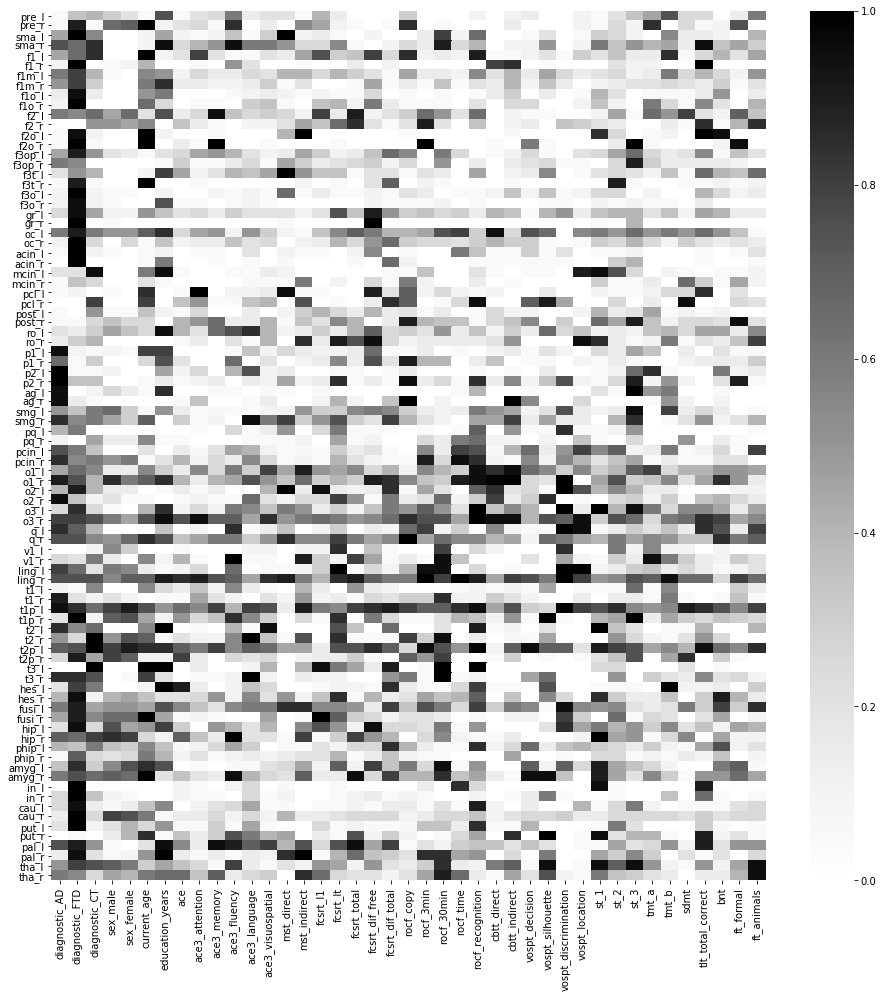

In [16]:
matplotlib.rcParams['figure.figsize'] = (16,16)
seaborn.heatmap(map_aal,cmap='Greys',xticklabels=True,yticklabels=True)

#### Brodmann atlas (47 regions)

Down below we show the **sorted regions according to accuracy and f1 score**. In the second table, only test information is given (those regions appearing at the top are the ones with better overall models).

In [17]:
metrics_pct_brodmann = pandas.concat([metrics_brodmann,pct_brodmann],join='inner')
metrics_pct_brodmann

,Region=b21,Region=b39,Region=b43,Region=b40,Region=b20,Region=b25,Region=b45,Region=b37,Region=b47,Region=b7,Region=b19,Region=b18,Region=b32,Region=b22,Region=b38,Region=b36,Region=b17,Region=b13,Region=b28,Region=b34,Region=b27,Region=b6,Region=b2,Region=b29,Region=b44,Region=b42,Region=b10,Region=b46,Region=b31,Region=b11,Region=b9,Region=b8,Region=b35,Region=b23,Region=b24,Region=b5,Region=b4,Region=b3,Region=b1,Region=b41,Region=b33,Region=b30
accuracy_test,0.802+/-0.031,0.833+/-0.037,0.990+/-0.014,0.772+/-0.036,0.773+/-0.031,0.931+/-0.028,0.918+/-0.024,0.790+/-0.039,0.840+/-0.031,0.789+/-0.039,0.778+/-0.045,0.866+/-0.036,0.871+/-0.025,0.757+/-0.041,0.796+/-0.038,0.890+/-0.020,0.951+/-0.018,0.821+/-0.039,0.912+/-0.026,0.959+/-0.022,0.995+/-0.009,0.758+/-0.043,0.903+/-0.027,0.996+/-0.010,0.910+/-0.031,0.897+/-0.024,0.754+/-0.045,0.831+/-0.034,0.766+/-0.040,0.784+/-0.043,0.756+/-0.042,0.759+/-0.045,0.929+/-0.025,0.892+/-0.032,0.816+/-0.036,0.905+/-0.027,0.931+/-0.023,0.925+/-0.035,0.940+/-0.028,0.884+/-0.027,0.999+/-0.004,0.773+/-0.050
accuracy_train,0.905+/-0.009,0.970+/-0.009,0.998+/-0.002,0.855+/-0.015,0.895+/-0.008,0.997+/-0.002,0.998+/-0.002,0.890+/-0.010,0.878+/-0.009,0.912+/-0.010,0.813+/-0.014,0.976+/-0.007,0.884+/-0.007,0.859+/-0.015,0.833+/-0.014,0.989+/-0.005,0.974+/-0.005,0.833+/-0.011,0.982+/-0.007,0.980+/-0.004,0.997+/-0.002,0.847+/-0.012,0.992+/-0.003,1.000+/-0.000,0.933+/-0.009,0.971+/-0.006,0.789+/-0.011,0.912+/-0.014,0.850+/-0.009,0.818+/-0.014,0.802+/-0.019,0.870+/-0.015,0.986+/-0.005,0.948+/-0.011,0.820+/-0.011,0.980+/-0.006,0.972+/-0.007,0.989+/-0.006,0.973+/-0.006,0.938+/-0.010,1.000+/-0.001,0.830+/-0.022
f1_test,0.775+/-0.035,0.744+/-0.054,0.779+/-0.304,0.732+/-0.038,0.725+/-0.045,0.644+/-0.130,0.633+/-0.113,0.699+/-0.049,0.638+/-0.057,0.677+/-0.055,0.685+/-0.053,0.616+/-0.096,0.582+/-0.080,0.674+/-0.050,0.642+/-0.067,0.533+/-0.077,0.521+/-0.139,0.603+/-0.074,0.552+/-0.132,0.558+/-0.189,0.707+/-0.390,0.644+/-0.063,0.541+/-0.126,0.720+/-0.426,0.513+/-0.113,0.512+/-0.110,0.618+/-0.055,0.546+/-0.077,0.596+/-0.058,0.586+/-0.066,0.607+/-0.061,0.603+/-0.058,0.500+/-0.152,0.479+/-0.103,0.485+/-0.082,0.442+/-0.141,0.432+/-0.172,0.476+/-0.209,0.459+/-0.223,0.373+/-0.099,0.600+/-0.490,0.355+/-0.061
f1_train,0.892+/-0.009,0.955+/-0.012,0.958+/-0.041,0.828+/-0.015,0.875+/-0.010,0.985+/-0.008,0.991+/-0.007,0.841+/-0.013,0.722+/-0.017,0.867+/-0.014,0.731+/-0.015,0.932+/-0.018,0.633+/-0.022,0.815+/-0.018,0.706+/-0.022,0.956+/-0.020,0.749+/-0.037,0.630+/-0.019,0.915+/-0.032,0.772+/-0.042,0.883+/-0.064,0.775+/-0.015,0.969+/-0.011,1.000+/-0.000,0.632+/-0.035,0.868+/-0.022,0.671+/-0.014,0.766+/-0.028,0.737+/-0.013,0.643+/-0.022,0.674+/-0.024,0.781+/-0.021,0.911+/-0.029,0.740+/-0.044,0.502+/-0.020,0.892+/-0.030,0.763+/-0.048,0.924+/-0.037,0.749+/-0.046,0.624+/-0.037,0.986+/-0.047,0.490+/-0.037
precision_test,0.732+/-0.048,0.738+/-0.066,0.770+/-0.334,0.681+/-0.050,0.680+/-0.041,0.742+/-0.189,0.771+/-0.160,0.621+/-0.060,0.599+/-0.081,0.637+/-0.061,0.606+/-0.068,0.587+/-0.109,0.555+/-0.082,0.622+/-0.070,0.620+/-0.069,0.543+/-0.124,0.446+/-0.136,0.513+/-0.071,0.566+/-0.162,0.495+/-0.247,0.667+/-0.406,0.576+/-0.056,0.637+/-0.173,0.707+/-0.435,0.436+/-0.130,0.483+/-0.108,0.531+/-0.061,0.474+/-0.079,0.493+/-0.053,0.457+/-0.062,0.543+/-0.064,0.525+/-0.072,0.529+/-0.197,0.385+/-0.111,0.419+/-0.075,0.457+/-0.173,0.357+/-0.149,0.491+/-0.258,0.365+/-0.210,0.268+/-0.086,0.600+/-0.490,0.249+/-0.059
precision_train,0.840+/-0.017,0.929+/-0.023,0.922+/-0.075,0.776+/-0.025,0.814+/-0.015,0.971+/-0.016,0.982+/-0.014,0.746+/-0.019,0.668+/-0.027,0.801+/-0.021,0.647+/-0.023,0.873+/-0.031,0.586+/-0.023,0.732+/-0.025,0.677+/-0.032,0.916+/-0.036,0.601+/-0.048,0.532+/-0.022,0.845+/-0.055,0.631+/-0.056,0.797+/-0.109,0.693+/-0.022,0.940+/-0.021,1.000+/-0.000,0.510+/-0.038,0.768+/-0.034,0.572+/-0.016,0.649+/-0.039,0.610+/-0.016,0.503+/-0.022,0.610+/-0.034,0.681+/-0.029,0.838+/-0.051,0.589+/-0.056,0.425+/-0.021,0.807+/-0.049,0.620+/-0.064,0.861+/-0.0

In [18]:
metrics_pct_brodmann.transpose()[['accuracy_test','f1_test','precision_test','recall_test','percentage_positive']]

,accuracy_test,f1_test,precision_test,recall_test,percentage_positive
Region=b21,0.802+/-0.031,0.775+/-0.035,0.732+/-0.048,0.828+/-0.068,0.413
Region=b39,0.833+/-0.037,0.744+/-0.054,0.738+/-0.066,0.754+/-0.068,0.322
Region=b43,0.990+/-0.014,0.779+/-0.304,0.770+/-0.334,0.840+/-0.307,0.021
Region=b40,0.772+/-0.036,0.732+/-0.038,0.681+/-0.050,0.794+/-0.053,0.392
Region=b20,0.773+/-0.031,0.725+/-0.045,0.680+/-0.041,0.783+/-0.081,0.386
Region=b25,0.931+/-0.028,0.644+/-0.130,0.742+/-0.189,0.594+/-0.144,0.105
Region=b45,0.918+/-0.024,0.633+/-0.113,0.771+/-0.160,0.563+/-0.146,0.13
Region=b37,0.790+/-0.039,0.699+/-0.049,0.621+/-0.060,0.808+/-0.076,0.301
Region=b47,0.840+/-0.031,0.638+/-0.057,0.599+/-0.081,0.695+/-0.086,0.202
Region=b7,0.789+/-0.039,0.677+/-0.055,0.637+/-0.061,0.727+/-0.076,0.304


Down below, we include the **selected features for the best model and the most common features in all the models**.

In [19]:
features_brodmann

,Features best model,Features all models,Avg#
Region=b21,"[ace3_visuospatial, fcsrt_dif_free, st_1, rocf_time, fcsrt_dif_total, diagnostic_CT, ft_animals, fcsrt_lt, rocf_30min, fcsrt_l1, diagnostic_FTD]","[(st_1, 0.95), (rocf_30min, 0.95), (diagnostic_CT, 0.95), (ft_animals, 0.85), (rocf_time, 0.8), (fcsrt_lt, 0.7), (fcsrt_dif_total, 0.6), (diagnostic_FTD, 0.4), (fcsrt_l1, 0.4), (ace3_visuospatial, 0.4), (fcsrt_total, 0.3), (rocf_3min, 0.25), (diagnostic_AD, 0.25), (ace3_attention, 0.2), (st_2, 0.2), (fcsrt_dif_free, 0.2), (mst_indirect, 0.15), (current_age, 0.15), (st_3, 0.1), (tlt_total_correct, 0.1), (ace3_fluency, 0.05), (cbtt_indirect, 0.05), (mst_direct, 0.05), (ft_formal, 0.05), (ace3_memory, 0.05), (cbtt_direct, 0.05), (ace3_language, 0.05)]",9.25
Region=b39,"[st_2, fcsrt_lt, tmt_b, ace3_memory, fcsrt_dif_free, vospt_location, diagnostic_CT, ace3_visuospatial, st_3, ft_animals, vospt_silhouette, fcsrt_total, current_age, diagnostic_AD, sex_male, mst_direct, tmt_a, rocf_recognition, ft_formal]","[(rocf_recognition, 1.0), (fcsrt_lt, 1.0), (st_3, 1.0), (vospt_location, 0.95), (diagnostic_CT, 0.95), (fcsrt_total, 0.9), (diagnostic_AD, 0.85), (vospt_silhouette, 0.75), (fcsrt_l1, 0.65), (ace3_memory, 0.55), (cbtt_direct, 0.55), (sex_male, 0.55), (diagnostic_FTD, 0.5), (sex_female, 0.5), (tmt_a, 0.45), (ace3_visuospatial, 0.4), (ace, 0.4), (tmt_b, 0.35), (ace3_language, 0.35), (st_2, 0.35), (fcsrt_dif_total, 0.3), (mst_indirect, 0.25), (ace3_attention, 0.25), (ft_formal, 0.2), (fcsrt_dif_free, 0.2), (st_1, 0.2), (education_years, 0.2), (current_age, 0.2), (mst_direct, 0.2), (bnt, 0.15), (cbtt_indirect, 0.15), (ft_animals, 0.1), (ace3_fluency, 0.1), (vospt_decision, 0.05), (rocf_time, 0.05)]",15.60
Region=b43,"[ace3_visuospatial, st_1, fcsrt_l1, mst_direct, fcsrt_dif_free, bnt, ace, sex_male, diagnostic_CT, diagnostic_FTD, vospt_location, vospt_silhouette, st_2, cbtt_indirect, sex_female, education_years, fcsrt_lt]","[(fcsrt_lt, 0.95), (fcsrt_dif_free, 0.95), (bnt, 0.95), (vospt_silhouette, 0.85), (st_1, 0.85), (diagnostic_FTD, 0.8), (sex_female, 0.7), (sex_male, 0.7), (diagnostic_CT, 0.7), (education_years, 0.6), (ace3_memory, 0.6), (fcsrt_l1, 0.55), (diagnostic_AD, 0.5), (cbtt_indirect, 0.5), (ace3_language, 0.45), (ace, 0.45), (current_age, 0.4), (mst_direct, 0.4), (st_2, 0.4), (ace3_visuospatial, 0.35), (vospt_location, 0.35), (tmt_b, 0.3), (fcsrt_dif_total, 0.25), (rocf_copy, 0.2), (rocf_recognition, 0.2), (ft_formal, 0.15), (sdmt, 0.15), (mst_indirect, 0.15), (rocf_30min, 0.15), (rocf_time, 0.1), (st_3, 0.1), (vospt_decision, 0.05), (rocf_3min, 0.05), (fcsrt_total, 0.05)]",14.90
Region=b40,"[sex_male, diagnostic_CT, st_1, ace3_visuospatial, mst_indirect, rocf_recognition, current_age, diagnostic_AD, tmt_b]","[(st_1, 1.0), (rocf_recognition, 1.0), (diagnostic_AD, 0.95), (sex_male, 0.85), (sex_female, 0.75), (mst_indirect, 0.75), (st_3, 0.7), (tmt_b, 0.6), (tlt_total_correct, 0.45), (st_2, 0.4), (ft_formal, 0.4), (diagnostic_CT, 0.3), (current_age, 0.25), (ace3_visuospatial, 0.2), (ace3_fluency, 0.2), (rocf_time, 0.15), (cbtt_indirect, 0.15), (vospt_decision, 0.15), (education_years, 0.1), (rocf_3min, 0.1), (vospt_silhouette, 0.1), (diagnostic_FTD, 0.1), (ace3_attention, 0.05), (ace, 0.05), (fcsrt_dif_total, 0.05)]",9.80
Region=b20,"[rocf_3min, vospt_decision, st_1, st_2, fcsrt_l1, rocf_30min, fcsrt_lt, rocf_recognition, education_years, ft_animals, fcsrt_dif_total, diagnostic_CT]","[(diagnostic_CT, 0.9), (st_2, 0.7), (education_years, 0.65), (rocf_recognition, 0.55), (rocf_30min, 0.5), (fcsrt_dif_total, 0.5), (st_3, 0.35), (diagnostic_AD, 0.35), (vospt_decision, 0.35), (tlt_total_correct, 0.3), (rocf_3min, 0.3), (bnt, 0.25), (st_1, 0.25), (diagnostic_FTD, 0.2), (ace3_attention, 0.2), (fcsrt_total, 0.2), (ace3_visuospatial, 0.2), (mst_indirect, 0.15), (sdmt, 0.15), (ace3_memory, 0.15), (vospt_discrimination, 0.15), (fcsrt_lt, 0.15), (fcsrt_l1, 0.15), (rocf_time, 0.1), (tmt_b, 0.1), (ft_animals, 0.1), (vospt_silhouette, 0.1

Down below, we include a **heatmap indicating the frequency of each feature in predicting each region**. The regions are ordered according to the lobe they belong to. The features are ordered by nature (diagnostic features, demographic features and cognitive features -ordered themselves according to the cognitive function measured-). This makes it easier to see patterns.

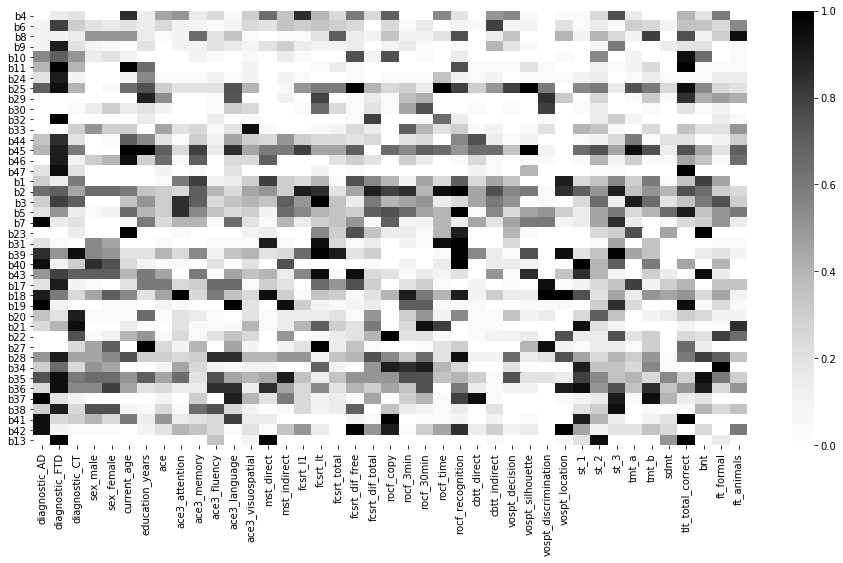

In [20]:
matplotlib.rcParams['figure.figsize'] = (16,8)
seaborn.heatmap(map_brodmann,cmap='Greys',xticklabels=True,yticklabels=True)

### Conclusions

One good news is that **results improve considerably in all brain regions**. Even with such improvement, the capability to detect positive labels remains low in many cases. In addition, there is a great variability. In the neural networks approach, we saw the following trend: "for those regions where the number of positive labels is low, the models yield lower f1 scores but higher accuracies; for those regions where the number of positive labels is moderate, the models yield higher f1 scores but lower accuracies".  With this approach, the trend is not that clear. In fact, **there are regions with few positive labels that the model detect with acceptable f1 scores**. However, it is also noticeable that more unbalanced regions tend to yield results with considerable variability.

There is some information that could be considered in relation to those regions that are better and worst predicted (note that we have left out those with very low percentages of positive labels, since they are very difficult to categorise).

#### AAL atlas (90 regions)

The advantage of using the AAL atlas is that we can have information regarding both hemispheres. Regarding this, we can appreciate that **left sides tend to be predicted better than right sides**. In the following summary, we include the hemisphere in brackets: right (R), left (L), both (B).

Within the regions that are **best predicted**, we can recognise:

- Frontal lobe:
    - **F2O (R)** (middle frontal gyrus, orbital part)
    - **F3O (L)** (inferior frontal gyrus, orbital part)
- Occipital lobe:
    - **O2 (B)** (middle occipital gyrus)
    - **O3 (B)** (inferior occipital gyrus)
- Parietal lobe:
    - **PCL (R)** (paracentral lobule)
    - **AG (B)** (angular gyrus)
- Temporal lobe:
    - **T2 (B)** (middle temporal gyrus)
    - **T3 (B)** (inferior temporal gyrus)
    - **FUSI (L)** (fusiform gyrus)
    - **AMYG (B)** (amygdala)
- Insular lobe:
    - **IN (L)** (insula)
- Subcortical region:
    - **CAU (L)** (caudate nucleus)
    - **THA (B)** (thalamus)

Within the regions that are **worst predicted**, we can recognise:

- Frontal lobe:
    - **SMA (R)** (supplementary motor area)
    - **F1M (R)** (superior frontal gyrus, medial part)
    - **F3OP (R)** (inferior frontal gyrus, opercular part)
    - **F3T (R)** (inferior frontal gyrus, triangular part)
    - **MCIN (B)** (median cingulate gyrus)
- Parietal lobe:
    - **PCL (L)** (paracentral lobule)
    - **POST (B)** (postcentral gyrus)
    - **RO (L)** (rolandic operculum)
    - **P1 (B)** (superior parietal gyrus)
    - **PCIN (B)** (posterior cingulate gyrus)
- Occipital lobe:
    - **V1 (B)** (calcarine fissure)
- Temporal lobe:
    - **T1 (B)** (superior temporal gyrus)
    - **HES (B)** (heschl gyrus)
    - **PHIP (R)** (parahippocampal gyrus)
- Subcortical region:
    - **CAU (R)** (caudate nucleus)
    
One interesting thing to see that some brain regions show a strange behaviour (one side is among the best predicted regions while the other side is among the worst predicted regions). These are the following (in brackets, we indicate the hemisphere that was better predicted):

- F3T (inferior frontal gyrus, triangular part) (L)
- PCL (paracentral lobule) (R)
- CAU (caudate nucleus) (L)

#### Brodmann atlas (47 regions)

Within the regions that are **best predicted**, we can recognise:

- Frontal lobe:
    - **B25** (ventromedial frontal cortex)
    - **B45** (broca's area)
    - **B47** (inferior frontal gyrus, orbital part)
- Parietal lobe:
    - **B7** (visuomotor coordination)
    - **B39** (angular gyrus)
    - **B40** (supramarginal gyrus)
    - **B43** (primary gustatory cortex)
- Temporal lobe:
    - **B20** (inferior temporal gyrus)
    - **B21** (middle temporal gyrus)
    - **B37** (fusiform gyrus)

Within the regions that are **worst predicted**, we can recognise:

- Frontal lobe:
    - **B1** (primary somatosensory cortex)
    - **B3** (primary somatosensory cortex)
    - **B4** (primary motor cortex)
    - **B8** (frontal cortex)
    - **B24** (ventral anterior cingulate cortex)
    - **B30** (retrosplenial cortex)
- Parietal lobe:
    - **B5** (superior parietal cortex)
    - **B23** (ventral posterior cingulate cortex)
- Temporal lobe:
    - **B35** (perirhinal cortex)
    - **B41** (auditory cortex)

In all cases, **we must think about the need for a predictive model**. It could happen that the region we are trying to predict is not really important for diagnosis. This particularly needs to be considered for those regions where the percentage of positive values is very low. It is quite likely that positive labels there do not have a real meaning but are just noise. In such case, a model won't be needed. How will we know which regions are important? We need to consider Fernando's results and have a look at those regions that are detected as relevant for diagnosis.